In [1]:
import tensorflow as tf
print(tf.__version__)

!pip install tslearn
!pip install keras_core

2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 13.8 MB/s eta 0:00:00


In [2]:
import tslearn # pour les séries
from tslearn.datasets import UCR_UEA_datasets
import keras_core as keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer
!pip install aeon
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 9.5 MB/s eta 0:00:00


In [ ]:
'''from aeon.datasets import load_classification
X, y, meta_data = load_classification("GunPoint")
print(" Shape of X = ", X.shape)
print(" Meta data = ", meta_data)'''


'from aeon.datasets import load_classification\nX, y, meta_data = load_classification("GunPoint")\nprint(" Shape of X = ", X.shape)\nprint(" Meta data = ", meta_data)'

In [ ]:
'''#Type image
data_loader = UCR_UEA_datasets()

X_train, y_train, X_test, y_test = data_loader.load_dataset("Adiac")
print("Shape of X_train:", X_train.shape)'''

In [11]:
#pour type de data simulted
data_loader = UCR_UEA_datasets()

x_train, y_train, x_test, y_test = data_loader.load_dataset("TwoPatterns")

print("Shape of X_train:", x_train.shape)
#Shape of X_train: (1000, 128, 1) : On dispose de 1000 séries temporelles dans notre ensemble de données d'entraînement. Chaque série temporelle a une longueur de 128, ET une seule variable;



Shape of X_train: (1000, 128, 1)


In [12]:
import numpy as np

unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
num_classes

4

On peut visulaiser la première série d'entrainement X_train[0]

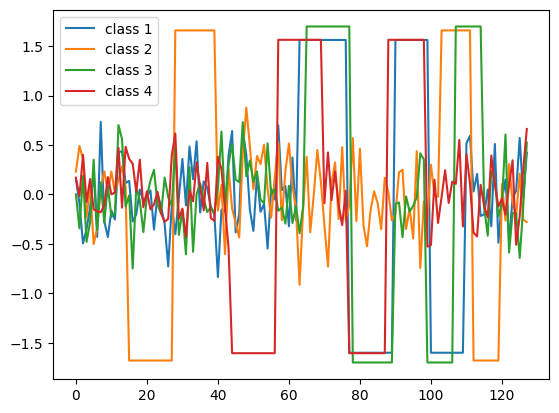

In [13]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()


Avnat de pouvoir mettre nos données dans le réseau, il va falloir les encoder en utilisant la méthode one hot encoding, ou chaque classe est représenté par un vecteur 1xn_classes . Le vecteur est composé de 0 et de 1 uniquement.
Par exemple la première classe peut etre représentée par (1,0,0,0)

In [14]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
input_layer = InputLayer(input_shape=(128,))
output_layer = Dense(units=5,activation="softmax")
model = Sequential([
    input_layer,
    output_layer
])
# fonction de coût en classif : l'entropie croisée :
# somme -log(P(y=yi|xi))
model.compile(optimizer="sgd", loss="categorical_crossentropy",metrics=["accuracy"])


In [23]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=[x_test, y_test])


Epoch 1/10
32/32 [==============================] - 1s 22ms/step - loss: 2.0785 - accuracy: 0.2020 - val_loss: 1.7974 - val_accuracy: 0.2447
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 1.6889 - accuracy: 0.2750 - val_loss: 1.5379 - val_accuracy: 0.3250
Epoch 3/10
32/32 [==============================] - 0s 12ms/step - loss: 1.4690 - accuracy: 0.3530 - val_loss: 1.3833 - val_accuracy: 0.3932
Epoch 4/10
32/32 [==============================] - 0s 13ms/step - loss: 1.3248 - accuracy: 0.4370 - val_loss: 1.2753 - val_accuracy: 0.4457
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 1.2196 - accuracy: 0.4790 - val_loss: 1.1924 - val_accuracy: 0.4890
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 1.1352 - accuracy: 0.5230 - val_loss: 1.1267 - val_accuracy: 0.5275
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 1.0671 - accuracy: 0.5530 - val_loss: 1.0718 - val_accuracy: 0.5620
Epoch 8/10
32/32 

In [21]:
y_train[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [25]:
model2 = Sequential([
    InputLayer(input_shape=(128,)),
    Dense(units=256, activation="relu"),
    Dense(units=256, activation="relu"),
    Dense(units=256, activation="sigmoid"),
    Dense(units=5, activation="softmax")
])

model2.compile(optimizer="sgd", loss="categorical_crossentropy",metrics=["accuracy"])

model2.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=[x_test, y_test])


Epoch 1/20
32/32 [==============================] - 3s 60ms/step - loss: 1.5089 - accuracy: 0.2790 - val_loss: 1.4121 - val_accuracy: 0.2788
Epoch 2/20
32/32 [==============================] - 0s 14ms/step - loss: 1.3922 - accuracy: 0.3310 - val_loss: 1.3933 - val_accuracy: 0.2570
Epoch 3/20
32/32 [==============================] - 0s 11ms/step - loss: 1.3674 - accuracy: 0.3630 - val_loss: 1.3592 - val_accuracy: 0.3735
Epoch 4/20
32/32 [==============================] - 0s 11ms/step - loss: 1.3438 - accuracy: 0.3980 - val_loss: 1.3479 - val_accuracy: 0.3365
Epoch 5/20
32/32 [==============================] - 0s 12ms/step - loss: 1.3273 - accuracy: 0.4040 - val_loss: 1.3202 - val_accuracy: 0.4215
Epoch 6/20
32/32 [==============================] - 0s 15ms/step - loss: 1.3073 - accuracy: 0.4470 - val_loss: 1.3062 - val_accuracy: 0.3853
Epoch 7/20
32/32 [==============================] - 0s 14ms/step - loss: 1.2878 - accuracy: 0.4370 - val_loss: 1.2853 - val_accuracy: 0.4302
Epoch 8/20
32